# CLUSTERING ANALYSIS

In [3]:
import pandas as pd
df=pd.read_excel("C:\\Users\\beaut\\Downloads\\Clustering\\Clustering\\EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing 

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., with mean imputation)
df.fillna(df.mean(), inplace=True)

# Identify outliers (e.g., using IQR)
for column in df.select_dtypes(include=['number']).columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Scale the features (e.g., using StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the preprocessed dataset
print(df)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.892083 -0.351730         0.0  -0.571271        0.0        0.0   
1    -1.891230 -0.573510         0.0  -0.571271        0.0        0.0   
2    -1.890377 -0.022485         0.0  -0.571271        0.0        0.0   
3    -1.889524 -0.684862         0.0  -0.571271        0.0        0.0   
5    -1.887818 -0.643890         0.0  -0.571271        0.0        0.0   
...        ...       ...         ...        ...        ...        ...   
3990  1.530211 -0.771242         0.0  -0.571271        0.0        0.0   
3991  1.531064 -0.077612         0.0   1.522607        0.0        0.0   
3992  1.531917 -0.774457         0.0  -0.571271       

In [5]:
import warnings
warnings.filterwarnings('ignore')

                ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  1.785000e+03  1.785000e+03      1785.0  1.785000e+03     1785.0   
mean   6.369011e-17 -3.184505e-17         0.0 -7.961263e-17        0.0   
std    1.000280e+00  1.000280e+00         0.0  1.000280e+00        0.0   
min   -1.892083e+00 -1.051415e+00         0.0 -5.712709e-01        0.0   
25%   -8.573766e-01 -7.317403e-01         0.0 -5.712709e-01        0.0   
50%    8.776349e-02 -3.437295e-01         0.0 -5.712709e-01        0.0   
75%    9.143346e-01  4.371517e-01         0.0  4.756681e-01        0.0   
max    1.537035e+00  3.854582e+00         0.0  2.569546e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     1785.0  1.785000e+03  1.785000e+03             1785.0   
mean         0.0  1.592253e-17 -3.980632e-17                0.0   
std          0.0  1.000280e+00  1.000280e+00                0.0   
min          0.0 -6.804208e-01 -1.059947e+00                0.0  

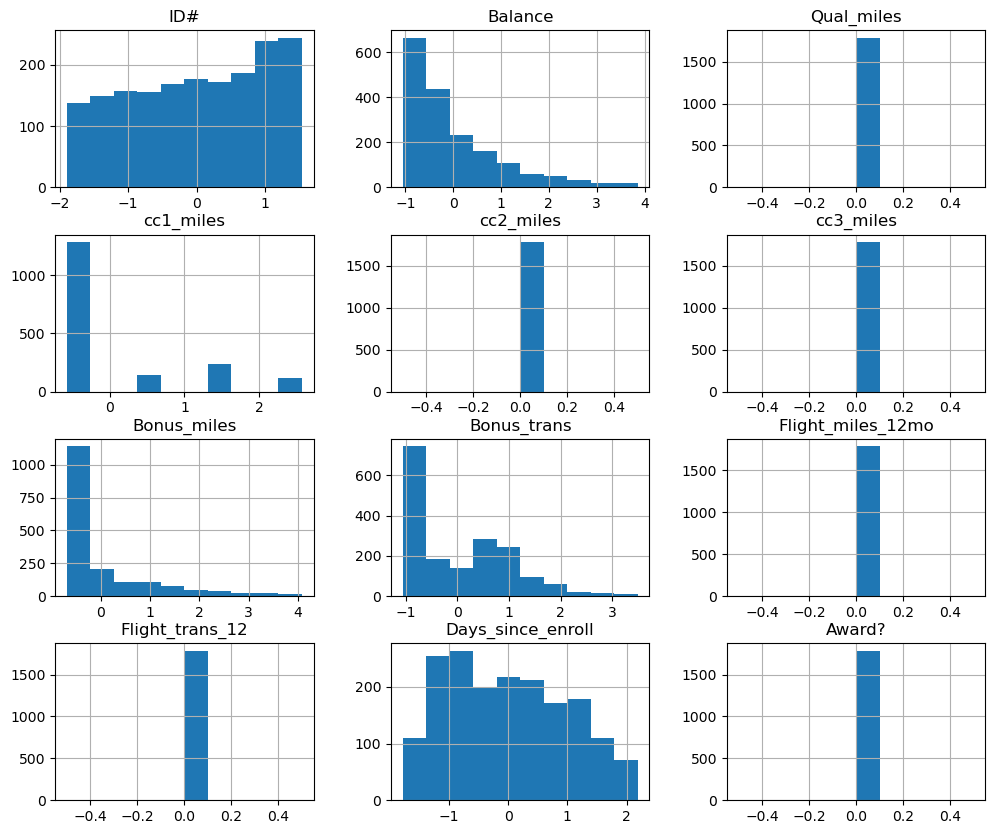

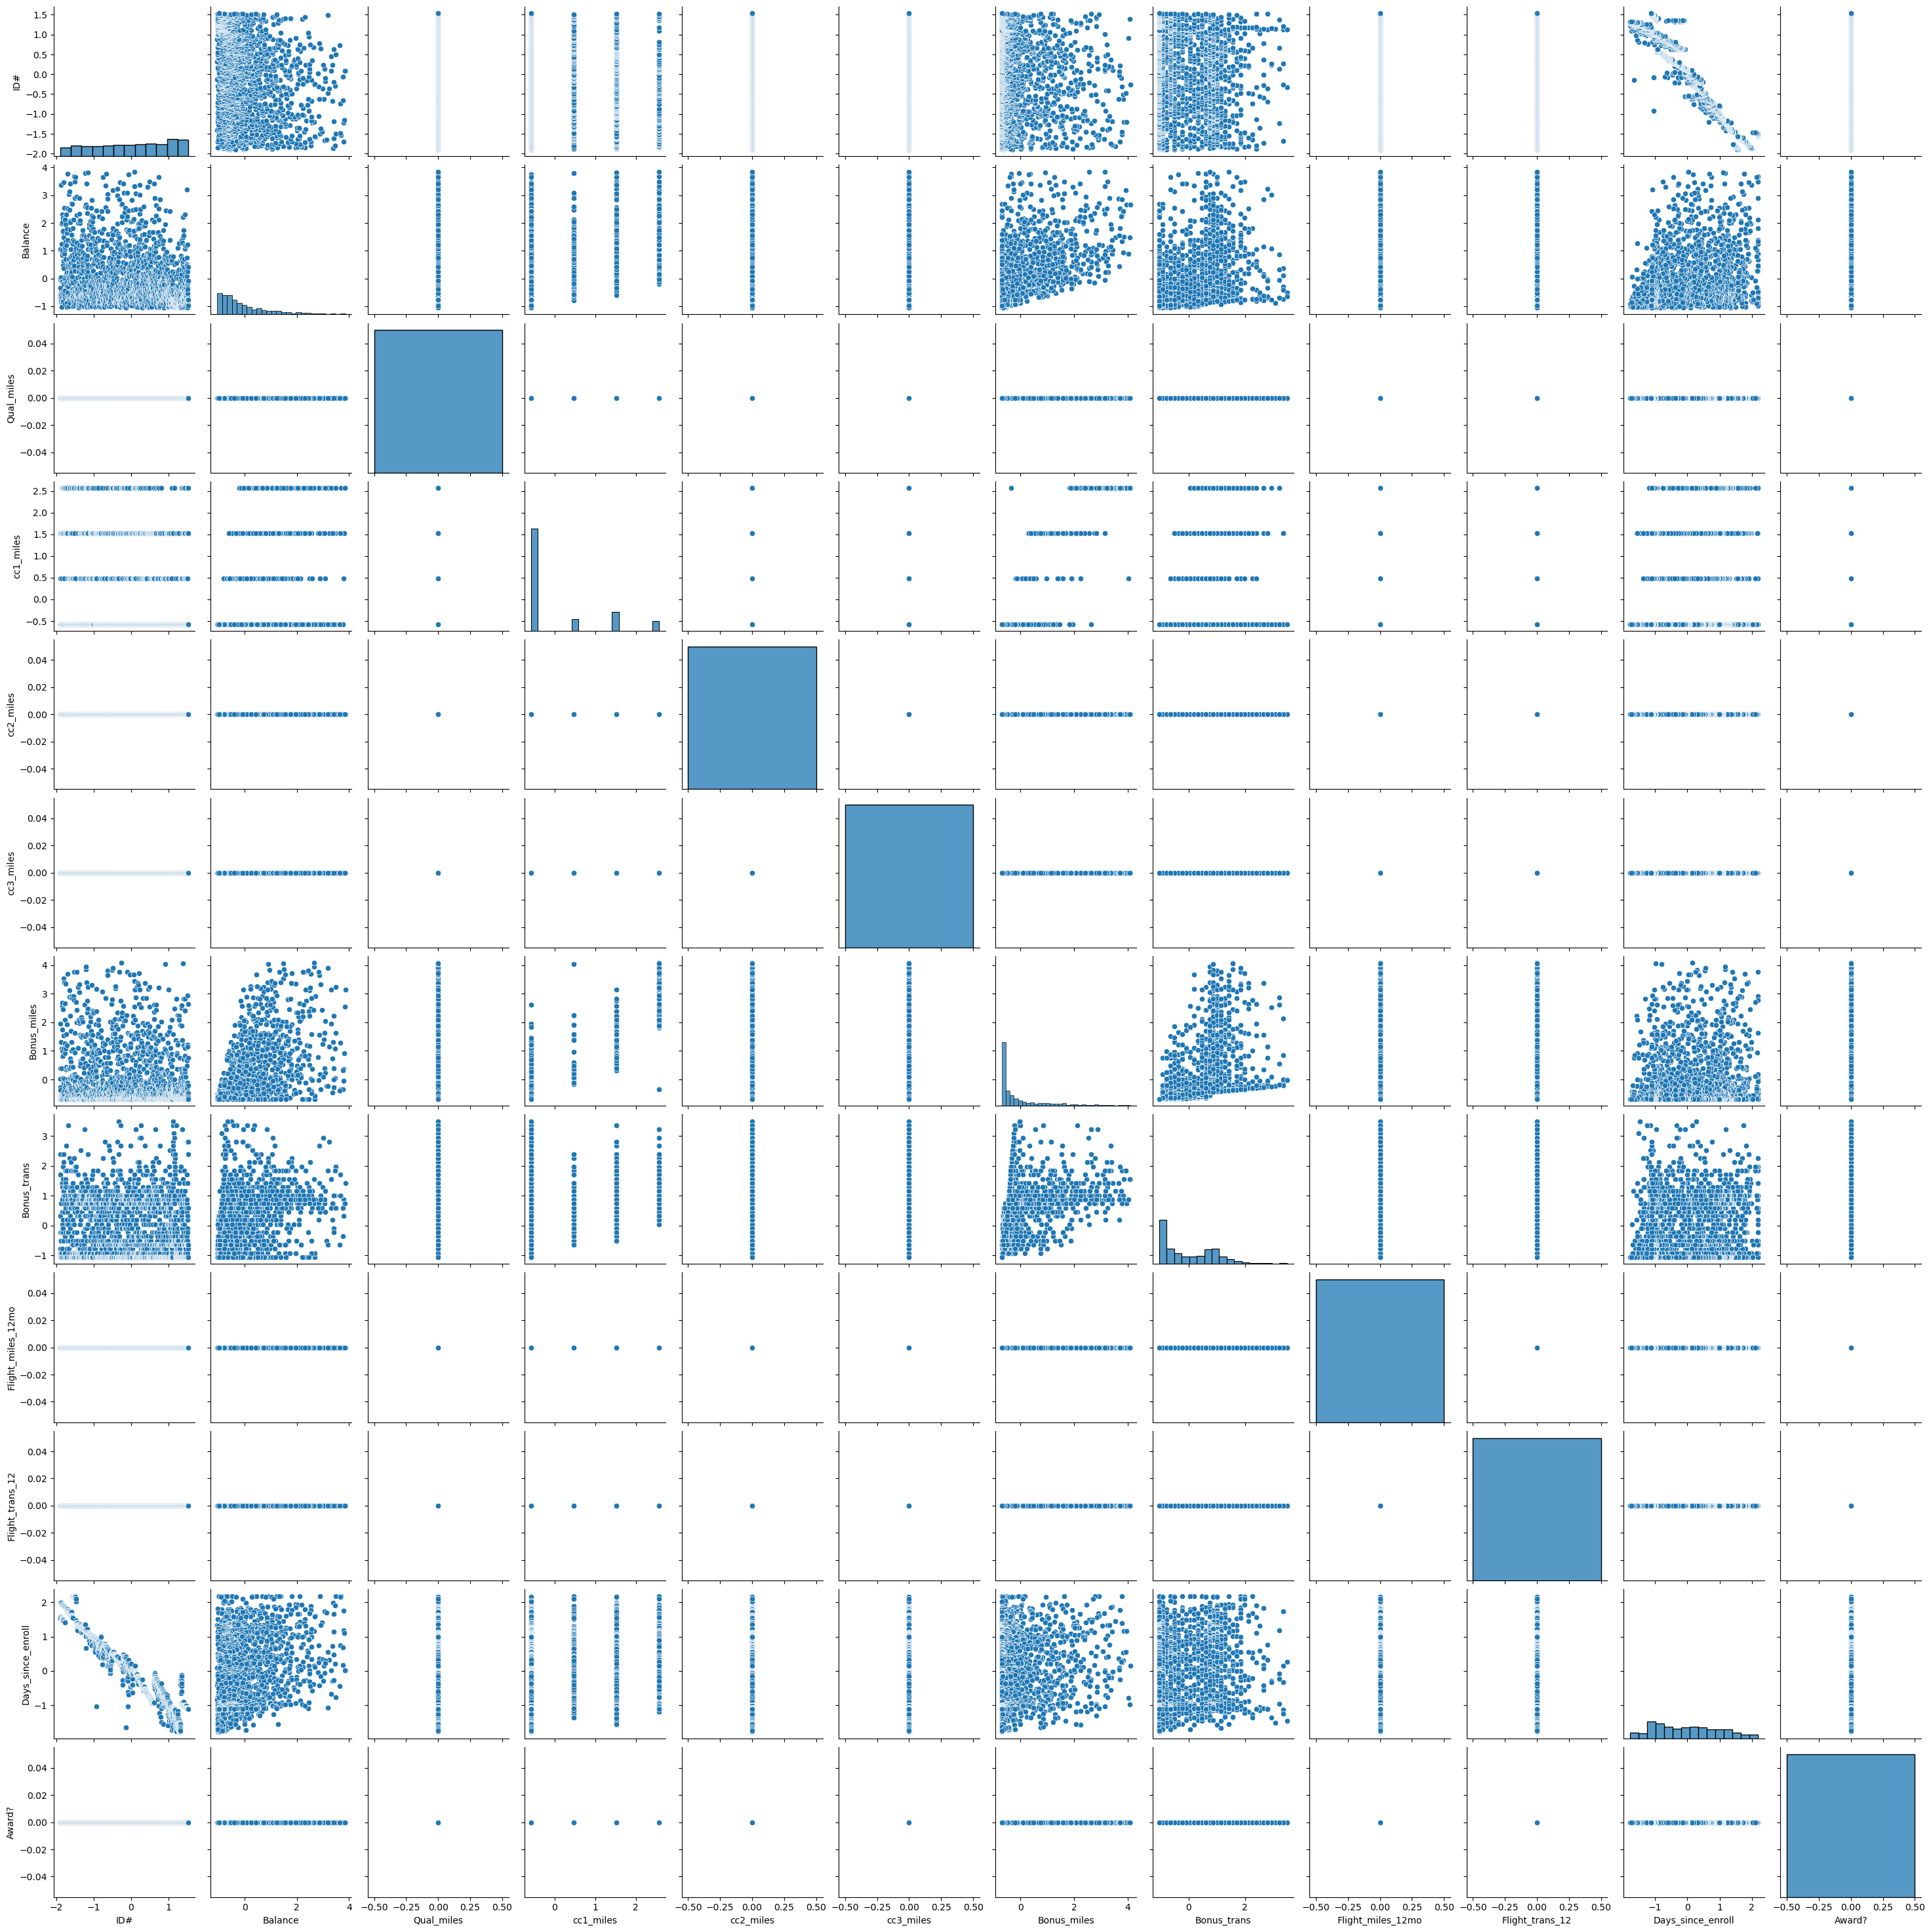

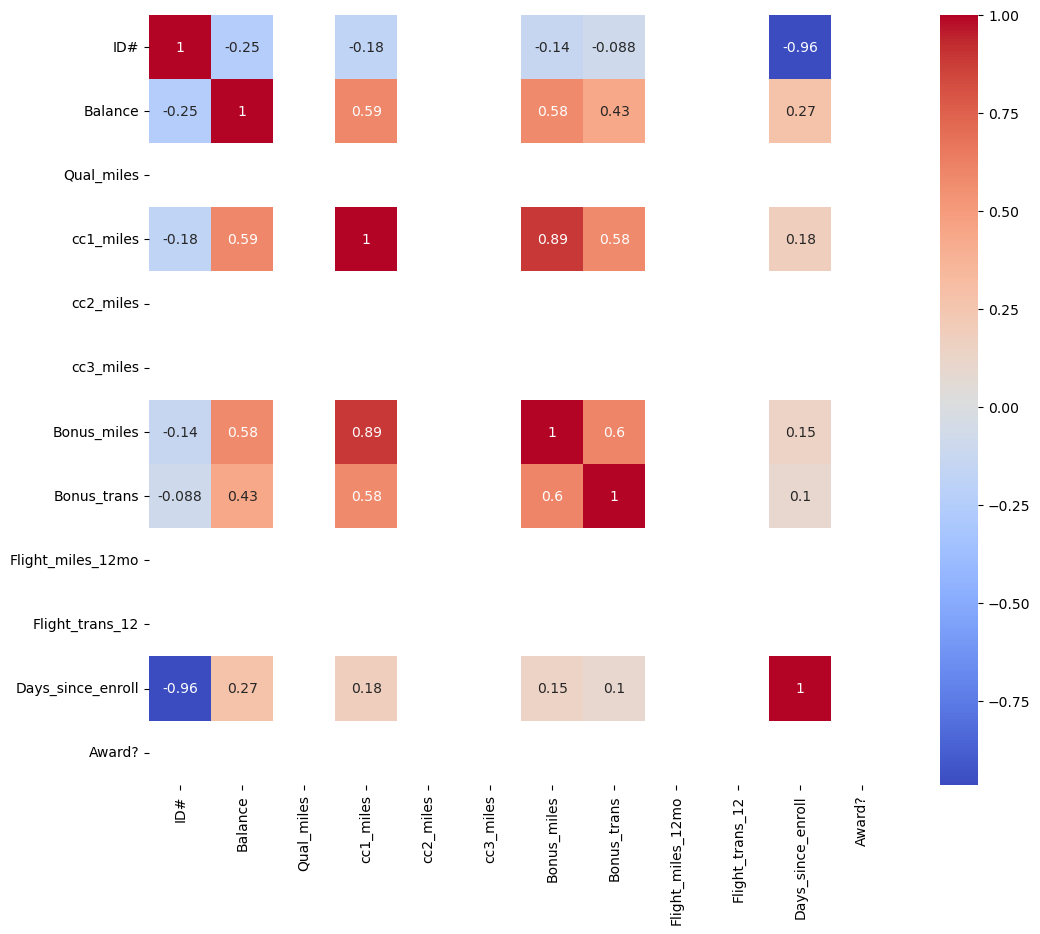

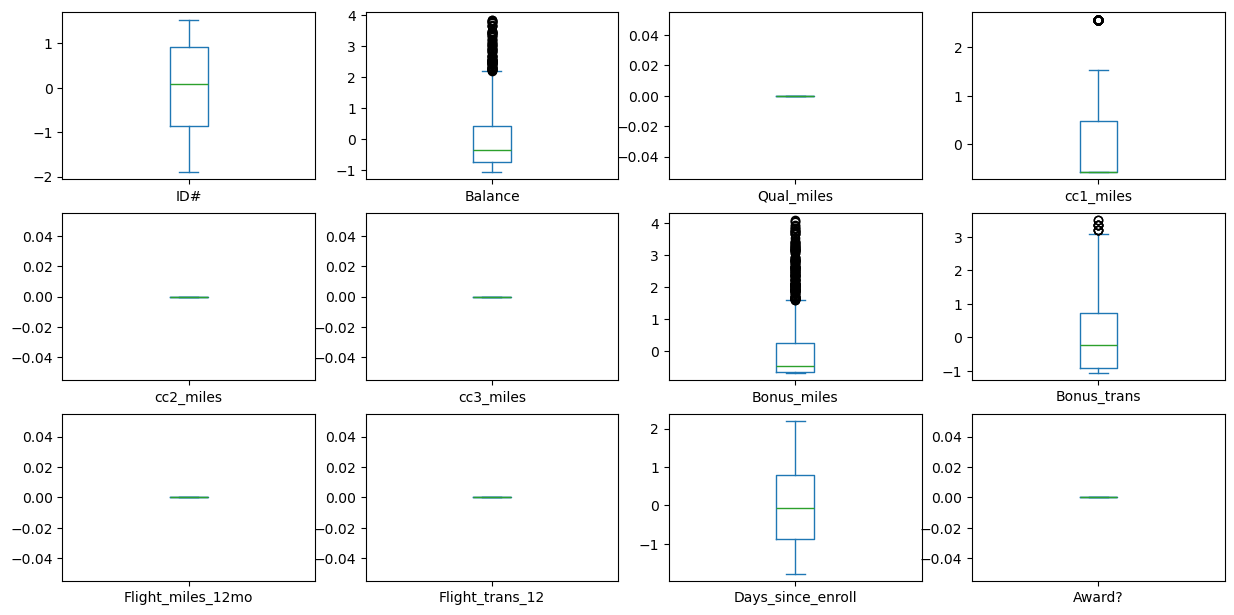

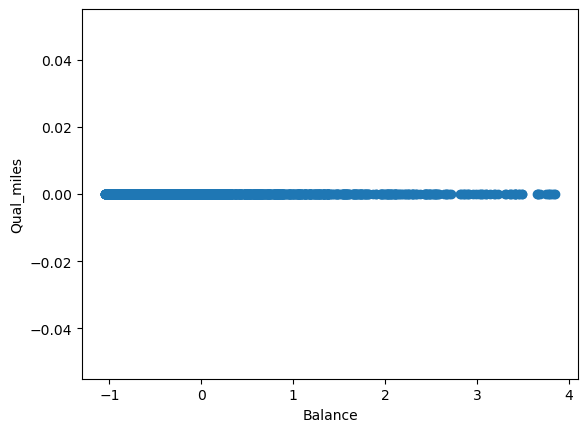

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Histograms to visualize the distribution of each feature
df.hist(figsize=(12, 10))
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

# Correlation matrix to identify relationships between features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Box plots to identify potential outliers in each feature
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.show()

# Scatter plots to explore relationships between specific features
plt.scatter(df['Balance'], df['Qual_miles'])
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()

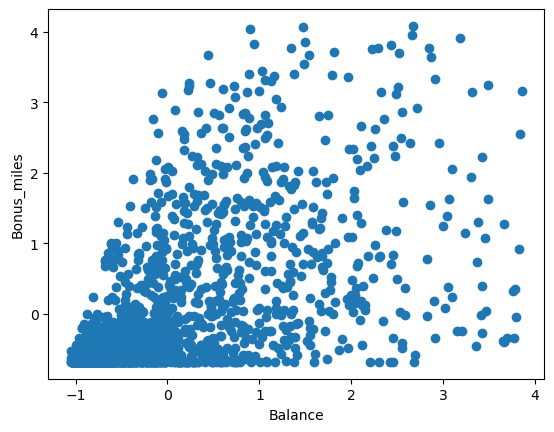

In [7]:
# Explore potential clusters using scatter plots
plt.scatter(df['Balance'], df['Bonus_miles'])
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

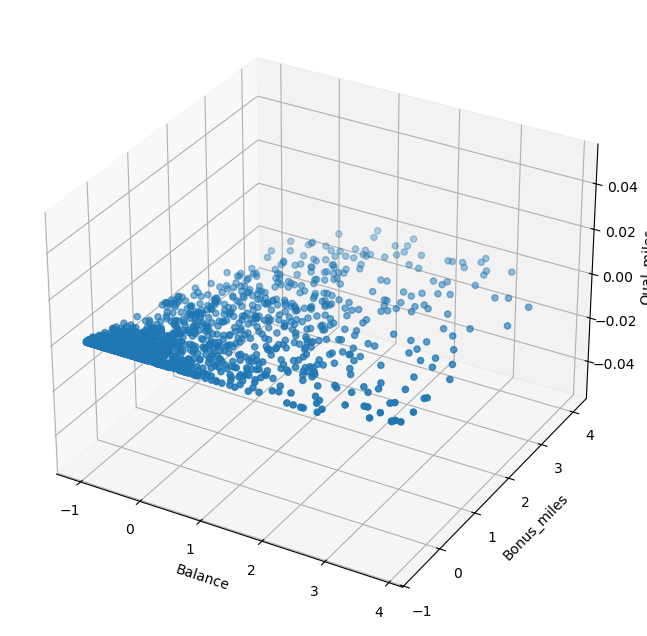

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot matrix with color-coded clusters (if applicable)
# (We might need to perform clustering first using algorithms like KMeans)
# sns.pairplot(df, hue='cluster_label') # Assuming 'cluster_label' is a column indicating clusters
# plt.show()

# Create a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Balance'], df['Bonus_miles'], df['Qual_miles'])
ax.set_xlabel('Balance')
ax.set_ylabel('Bonus_miles')
ax.set_zlabel('Qual_miles')
plt.show()

# Implementing Clustering Algorithms

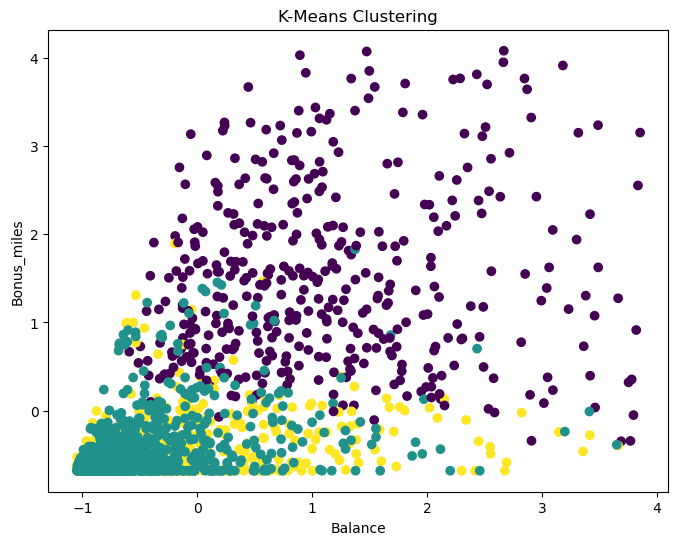

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (n_clusters)
df['kmeans_cluster'] = kmeans.fit_predict(df[numerical_features])

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Choose the number of clusters (n_clusters)
df['hierarchical_cluster'] = hierarchical.fit_predict(df[numerical_features])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
df['dbscan_cluster'] = dbscan.fit_predict(df[numerical_features])


# Visualize the clusters using scatter plots (example with K-Means)
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('K-Means Clustering')
plt.show()

Linkage: ward, Silhouette Score: 0.3188776168209339
Linkage: complete, Silhouette Score: 0.37810054621372613
Linkage: average, Silhouette Score: 0.3461719512199277
Linkage: single, Silhouette Score: 0.2820140125318641


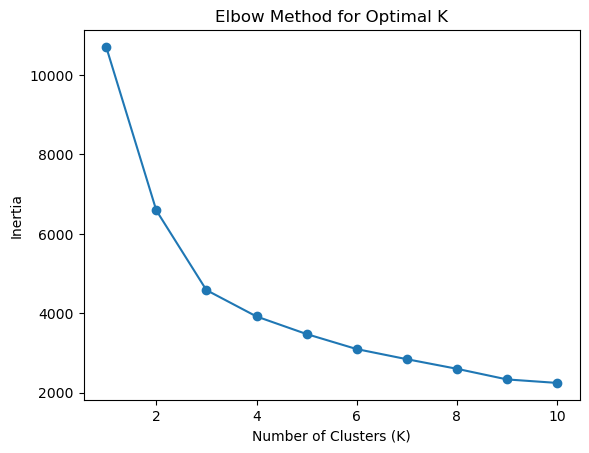

Epsilon: 0.5, MinPts: 5, Silhouette Score: -0.19500040991607415
Epsilon: 0.5, MinPts: 10, Silhouette Score: 0.3074535319833019
Epsilon: 0.5, MinPts: 15, Silhouette Score: 0.07303774746622554
Epsilon: 1, MinPts: 5, Silhouette Score: 0.15831053687969757
Epsilon: 1, MinPts: 10, Silhouette Score: 0.16533236674038776
Epsilon: 1, MinPts: 15, Silhouette Score: 0.13573600549942813
Epsilon: 1.5, MinPts: 5, Silhouette Score: 0.3254867287276113
Epsilon: 1.5, MinPts: 10, Silhouette Score: 0.34731687780968534
Epsilon: 1.5, MinPts: 15, Silhouette Score: 0.3511885063487555


In [11]:
# Experiment with different parameter settings for hierarchical clustering
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Iterate through different linkage criteria
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    df['hierarchical_cluster'] = hierarchical.fit_predict(df[numerical_features])
    silhouette_avg = silhouette_score(df[numerical_features], df['hierarchical_cluster'])
    print(f"Linkage: {linkage}, Silhouette Score: {silhouette_avg}")

# Experiment with different K values for K-means and plot the Elbow curve
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[numerical_features])
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


# Experiment with different epsilon and minPts values for DBSCAN
from sklearn.cluster import DBSCAN
eps_values = [0.5, 1, 1.5]
minPts_values = [5, 10, 15]

for eps in eps_values:
    for minPts in minPts_values:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        df['dbscan_cluster'] = dbscan.fit_predict(df[numerical_features])
        # Evaluate the clustering results (e.g., using silhouette score if possible)
        try:
            silhouette_avg = silhouette_score(df[numerical_features], df['dbscan_cluster'])
            print(f"Epsilon: {eps}, MinPts: {minPts}, Silhouette Score: {silhouette_avg}")
        except ValueError:
            print(f"Epsilon: {eps}, MinPts: {minPts}, Silhoutte Score Cannot be calculated")

# Cluster analysis and interpretation

In [12]:
# Analyze K-Means Clusters
for cluster_id in df['kmeans_cluster'].unique():
  print(f"K-Means Cluster {cluster_id}:")
  cluster_data = df[df['kmeans_cluster'] == cluster_id]
  print(cluster_data.describe())
  # Add our insights here based on the statistics. For example:
  # # Insight: Cluster 0 has a lower average balance and fewer bonus miles, indicating a potential group of less active or budget-conscious customers.

# Analyze Hierarchical Clusters
for cluster_id in df['hierarchical_cluster'].unique():
  print(f"Hierarchical Cluster {cluster_id}:")
  cluster_data = df[df['hierarchical_cluster'] == cluster_id]
  print(cluster_data.describe())
  # Add our insights here based on the statistics. For example:
    # Analyze DBSCAN Clusters
for cluster_id in df['dbscan_cluster'].unique():
  if cluster_id != -1: # Exclude noise points (-1)
    print(f"DBSCAN Cluster {cluster_id}:")
    cluster_data = df[df['dbscan_cluster'] == cluster_id]
    print(cluster_data.describe())
    # Add our insights here based on the statistics. For example:
    # # Insight: Cluster 2 has a distinct characteristic of higher frequent flyer miles, suggesting a group of frequent travelers.

# Additional Insights:
# We might also consider:
# - Visualizing the clusters in different dimensions to identify key differentiating features
# - Comparing the cluster characteristics across different algorithms
# - Exploring the relationships between clusters and other variables (e.g., customer demographics, if available)

K-Means Cluster 2:
              ID#     Balance  Qual_miles   cc1_miles  cc2_miles  cc3_miles  \
count  595.000000  595.000000       595.0  595.000000      595.0      595.0   
mean    -0.910404   -0.223758         0.0   -0.486812        0.0        0.0   
std      0.542094    0.772787         0.0    0.291749        0.0        0.0   
min     -1.892083   -1.051415         0.0   -0.571271        0.0        0.0   
25%     -1.387525   -0.736513         0.0   -0.571271        0.0        0.0   
50%     -0.863348   -0.469137         0.0   -0.571271        0.0        0.0   
75%     -0.423619    0.007035         0.0   -0.571271        0.0        0.0   
max      0.068997    3.663430         0.0    1.522607        0.0        0.0   

       Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   595.000000   595.000000              595.0            595.0   
mean     -0.450689    -0.314368                0.0              0.0   
std       0.329437     0.840122                0.0      

# Visualization

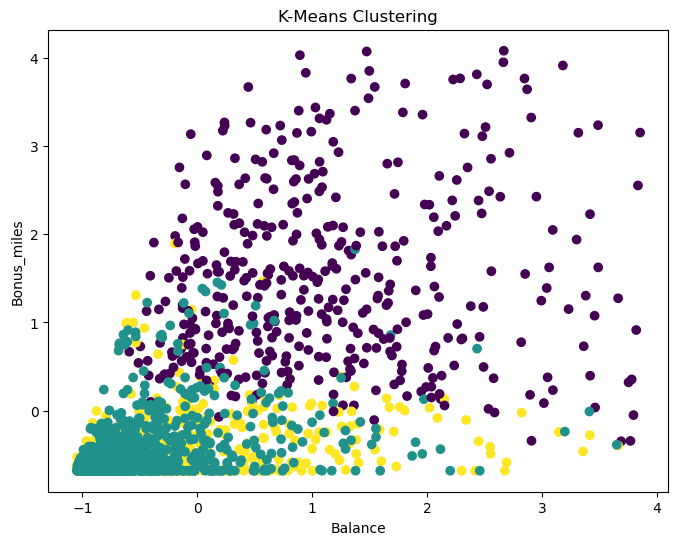

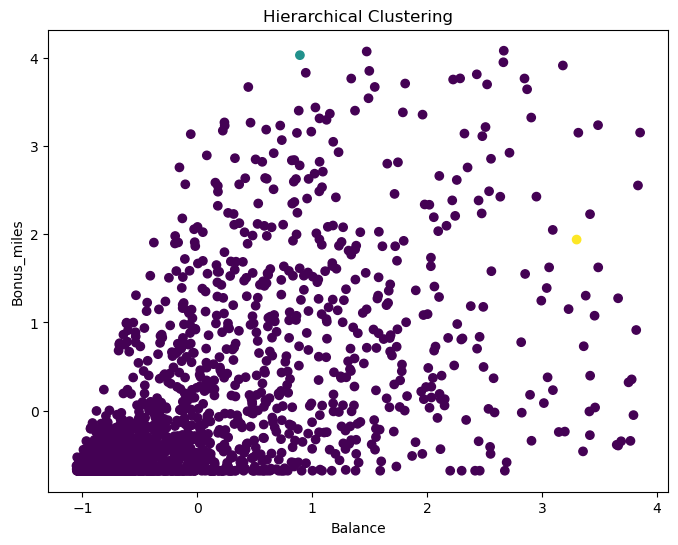

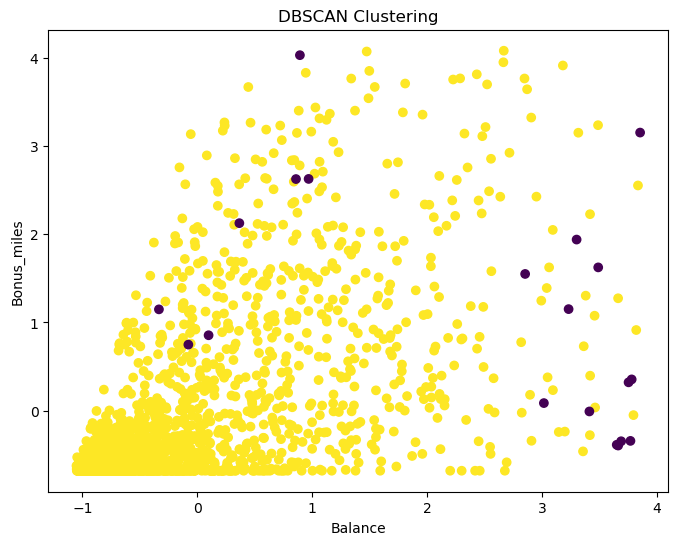

In [13]:
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['hierarchical_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['dbscan_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('DBSCAN Clustering')
plt.show()

# Evaluation and performance metrics

In [14]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(df[numerical_features], df['kmeans_cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

# Evaluate DBSCAN Clustering
dbscan_silhouette = silhouette_score(df[numerical_features], df['dbscan_cluster'])
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for K-Means: 0.36206693310207
Silhouette Score for DBSCAN: 0.3511885063487555
